# Reading File


# Importing packages


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy import stats
import statsmodels.api as sm
from scipy.stats import skew
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split



In [2]:


var = 'E:\\DATA_SCIENCE\\Interships\\Task-1\\tested.csv'



file = pd.read_csv(var)

In [3]:
data = pd.DataFrame(file)

In [4]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


# Data Cleaning

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [6]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
data.drop('PassengerId', axis = 1, inplace=True)
data.drop('Name', axis = 1, inplace=True)
data.drop('Cabin', axis = 1, inplace=True)
data.drop('Ticket', axis = 1, inplace=True)

data


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34.5,0,0,7.8292,Q
1,1,3,female,47.0,1,0,7.0000,S
2,0,2,male,62.0,0,0,9.6875,Q
3,0,3,male,27.0,0,0,8.6625,S
4,1,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...,...
413,0,3,male,NaN,0,0,8.0500,S
414,1,1,female,39.0,0,0,108.9000,C
415,0,3,male,38.5,0,0,7.2500,S
416,0,3,male,NaN,0,0,8.0500,S


In [8]:
data.isna().sum()

Survived     0
Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [9]:
data.shape

(418, 8)

In [10]:
data['Embarked'] = data['Embarked'].map( {'Q': 0,'S':1,'C':2}).astype(int)
data['Sex'] = data['Sex'].map( {'female': 1,'male':0}).astype(int)

In [11]:
data.Age.fillna(data.Age.mean(),inplace=True)

In [12]:
data["Age"]=data["Age"].astype(int)

In [13]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,34,0,0,7.8292,0
1,1,3,1,47,1,0,7.0000,1
2,0,2,0,62,0,0,9.6875,0
3,0,3,0,27,0,0,8.6625,1
4,1,3,1,22,1,1,12.2875,1
...,...,...,...,...,...,...,...,...
413,0,3,0,30,0,0,8.0500,1
414,1,1,1,39,0,0,108.9000,2
415,0,3,0,38,0,0,7.2500,1
416,0,3,0,30,0,0,8.0500,1


In [14]:
data.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        1
Embarked    0
dtype: int64

In [15]:
data.Fare.fillna(data.Fare.mean(),inplace=True)

In [16]:
data.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [17]:
data.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,0.363636,2.265550,0.363636,30.191388,0.447368,0.392344,35.627188,1.133971
std,0.481622,0.841838,0.481622,12.654104,0.896760,0.981429,55.840500,0.580452
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,23.000000,0.000000,0.000000,7.895800,1.000000
50%,0.000000,3.000000,0.000000,30.000000,0.000000,0.000000,14.454200,1.000000
75%,1.000000,3.000000,1.000000,35.750000,1.000000,0.000000,31.500000,1.000000
max,1.000000,3.000000,1.000000,76.000000,8.000000,9.000000,512.329200,2.000000


In [18]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,34,0,0,7.8292,0
1,1,3,1,47,1,0,7.0000,1
2,0,2,0,62,0,0,9.6875,0
3,0,3,0,27,0,0,8.6625,1
4,1,3,1,22,1,1,12.2875,1
...,...,...,...,...,...,...,...,...
413,0,3,0,30,0,0,8.0500,1
414,1,1,1,39,0,0,108.9000,2
415,0,3,0,38,0,0,7.2500,1
416,0,3,0,30,0,0,8.0500,1


In [19]:
data.dtypes

Survived      int64
Pclass        int64
Sex           int32
Age           int32
SibSp         int64
Parch         int64
Fare        float64
Embarked      int32
dtype: object

In [20]:
data.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

# Data Analysis

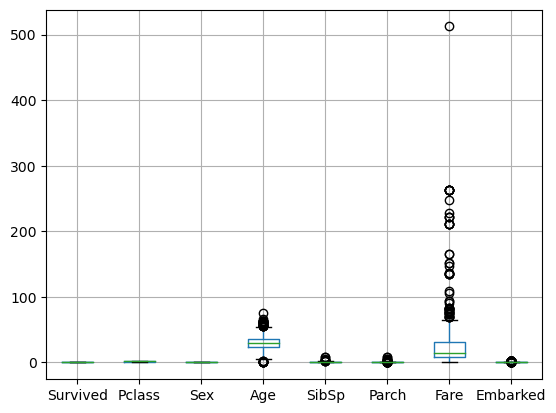

In [21]:
df = pd.DataFrame(data)
df.boxplot()
plt.show()

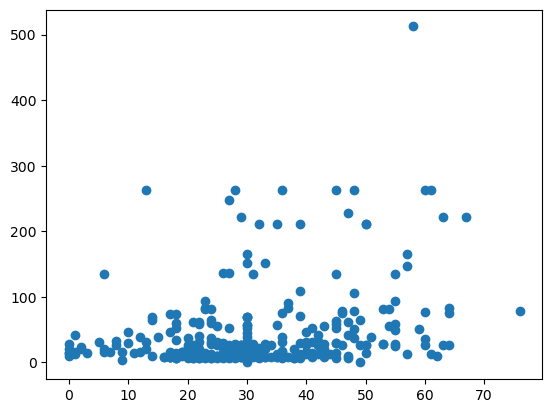

In [22]:
df = pd.DataFrame(data)
plt.scatter(df['Age'], df['Fare'])
plt.show()

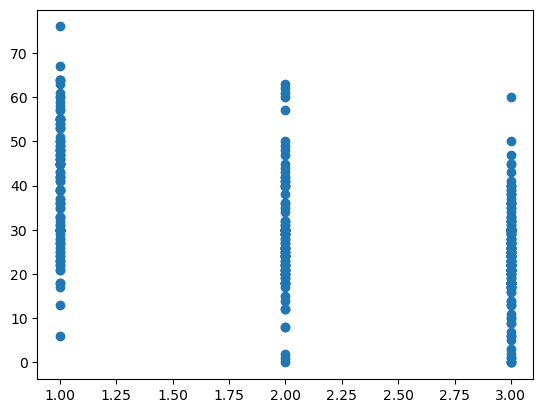

In [23]:
plt.scatter(df['Pclass'],df['Age'] )
plt.show()

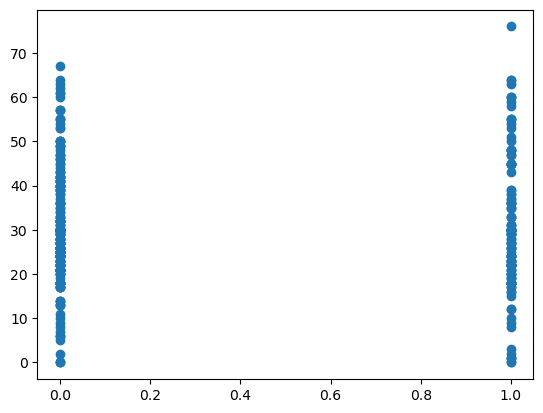

In [24]:
plt.scatter(df['Survived'],df['Age'] )
plt.show()


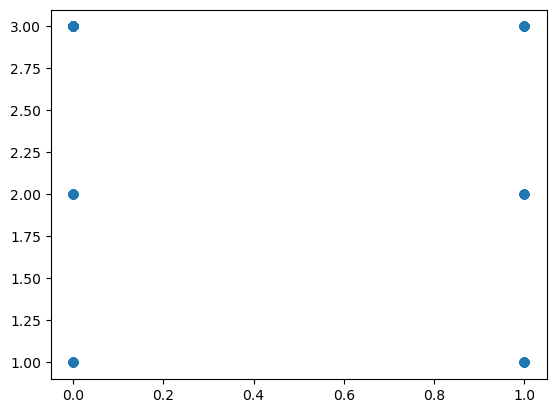

In [25]:
plt.scatter(df['Survived'],df['Pclass'] )
plt.show()


In [26]:
data.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.108615,1.000000,0.001538,0.099943,0.159120,0.191382,-0.037432
Pclass,-0.108615,1.000000,-0.108615,-0.443531,0.001087,0.018721,-0.576619,-0.372344
Sex,1.000000,-0.108615,1.000000,0.001538,0.099943,0.159120,0.191382,-0.037432
Age,0.001538,-0.443531,0.001538,1.000000,-0.079203,-0.045259,0.328250,0.127749
SibSp,0.099943,0.001087,0.099943,-0.079203,1.000000,0.306895,0.171488,0.041221
Parch,0.159120,0.018721,0.159120,-0.045259,0.306895,1.000000,0.230001,0.067474
Fare,0.191382,-0.576619,0.191382,0.328250,0.171488,0.230001,1.000000,0.315129
Embarked,-0.037432,-0.372344,-0.037432,0.127749,0.041221,0.067474,0.315129,1.000000


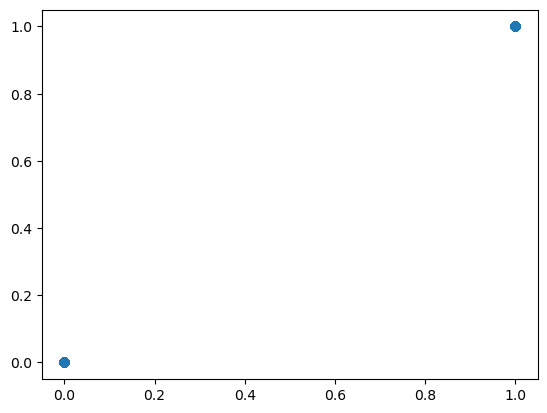

In [27]:
plt.scatter(df['Survived'],df['Sex'] )
plt.show()

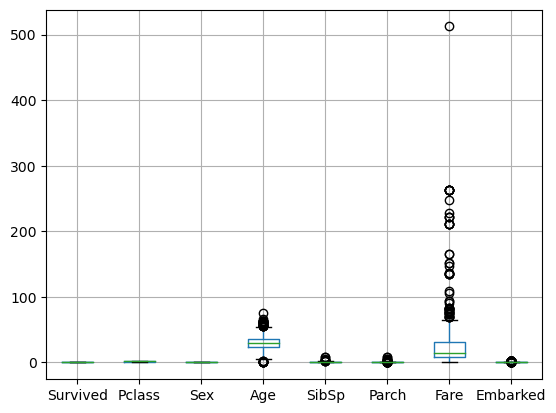

In [28]:
data.boxplot()
plt.show()

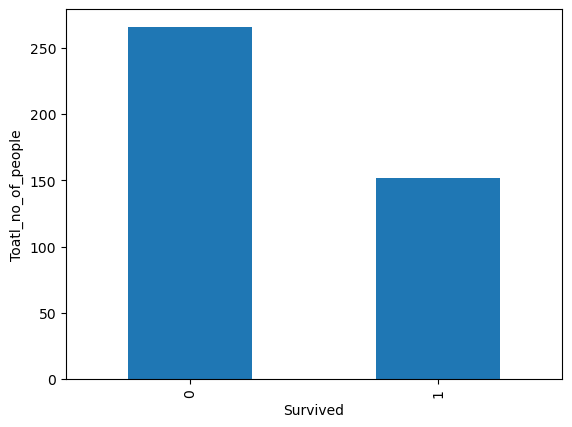

In [29]:
total_survived = data["Survived"].value_counts()
total_survived.plot(kind="bar")
plt.ylabel("Toatl_no_of_people")
plt.show()

In [30]:
scaler = StandardScaler()
standardized_data = scaler.fit_transform(data)


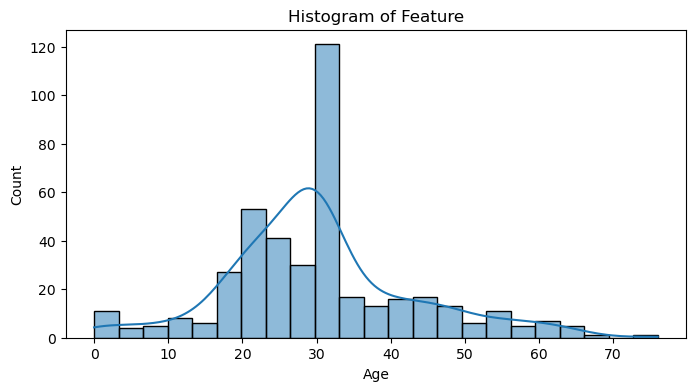

In [31]:
plt.figure(figsize=(8, 4))
sns.histplot(data=data, x='Age', kde=True)
plt.title('Histogram of Feature')
plt.show()


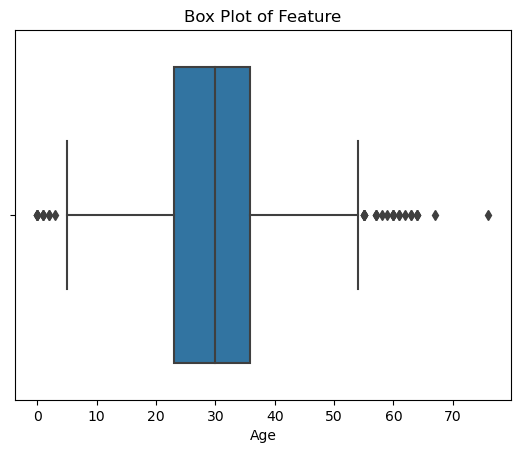

In [32]:
sns.boxplot(data=df, x='Age')
plt.title('Box Plot of Feature')
plt.show()


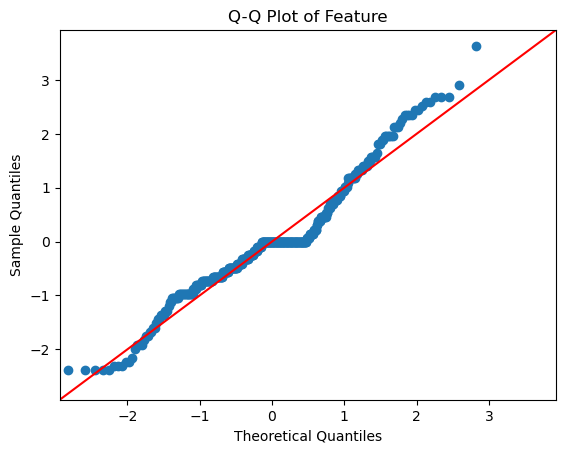

In [33]:
# Create a Q-Q plot
sm.qqplot(df['Age'], line='45', fit=True, dist=stats.norm)
plt.title('Q-Q Plot of Feature')
plt.show()


In [34]:
skewness = skew(df['Age'])
print(f'Skewness of Feature: {skewness}')


Skewness of Feature: 0.5142262435570987


# Model Building


In [35]:
Train_data_set = df.drop(['Survived'], axis=1)
Test_data_set = df.iloc[:,1]
X_train, X_test, y_train, y_test = train_test_split(Train_data_set,Test_data_set , test_size=0.2, random_state=42)
model = LogisticRegression(solver='liblinear',max_iter=250)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
sc = accuracy_score(y_pred,y_test)
print('Logistic regression accuracy: {:.2f}%'.format(sc*100))

Logistic regression accuracy: 92.86%


In [36]:
new_user_data = {
    'Pclass': 3,
    'Sex': 1,
    'Age': 25,
    'SibSp': 1,
    'Parch': 0,
    'Fare': 7.25,
    'Embarked': 1,
}

new_user_df = pd.DataFrame([new_user_data])

prediction = model.predict(new_user_df)


if prediction:
    print("Survived")
else:
    print("dead")

Survived
